# 📊 **Predicting Client Subscription to Term Deposits Using Machine Learning**

---

### 📌 **Objective**  
**To predict whether a bank client will subscribe to a term deposit** using socio-economic and campaign-related data.  
This helps banks optimize marketing efforts by focusing on the most impactful factors.

---

### 📂 **Dataset Information**  
- **Filename**: `bankmarketing.csv`  
- **Source**: Marketing campaigns of a Portuguese bank  
- **Features**:  
  - Client: `job`, `marital`, `education`, `default`, `housing`, `loan`, `balance`  
  - Campaign: `contact`, `day`, `month`, `duration`, `campaign`, `pdays`, `previous`, `poutcome`  
- **Target Variable**: `y` — whether the client subscribed to a term deposit (**yes/no**)

---

### 🧰 **Tools & Libraries Used**  
- **Python**  
- **Pandas**, **NumPy** – Data manipulation  
- **Matplotlib**, **Seaborn** – Data visualization  
- **Scikit-learn** – Model building and evaluation  
- **Google Colab / Jupyter Notebook** – Development environment

---

### 🔄 **Steps Performed**  
1. **Imported libraries and loaded the dataset**  
2. **Cleaned and preprocessed the data** (removed duplicates, handled types)  
3. **Performed EDA** to understand distributions and correlations  
4. **Encoded categorical variables and scaled numerical features**  
5. **Split the data** into training and testing sets  
6. **Trained models**:  
   - Logistic Regression  
   - Decision Tree  
   - Random Forest  
7. **Evaluated models** using Accuracy, Precision, Recall, and F1-score  
8. **Visualized** confusion matrices and feature importance  
9. **Summarized insights** and provided recommendations

---

### 📈 **Model Results (Summary)**  
- ✅ **Random Forest** performed best overall in both precision and recall  
- 📊 Evaluation metrics used:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-score**

---

### 💡 **Key Insights**  
- 📌 **Duration**, **poutcome**, **contact**, and **month** are the top predictors  
- 📆 **May** and **August** had the highest success rates in client conversion  
- ☎️ Longer call duration is strongly associated with positive responses  
- 🌲 Ensemble models like Random Forests deliver higher predictive power

---

### 📋 **Project Details**  
- **Project Type**: Classification (Supervised Learning)  
- **Domain**: Banking / Marketing Analytics  
- **Target Variable**: `y` (Binary: yes/no)  
- **Goal**: Predict subscription likelihood and improve campaign targeting

---

### 👤 **Author**: Meghana  
**📅 Date**: August 2025

---


In [11]:
# Bank Term Deposit Prediction - Classification Project
# -------------------------------------------------------
# Objective: Predict whether a client will subscribe to a term deposit using bank marketing data.
# Dataset: bankmarketing.csv

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 📌 Set plot style
sns.set(style="whitegrid")


In [12]:
# Step 2: Load the Dataset
# Make sure the CSV file is uploaded in the Colab environment or extracted properly

df = pd.read_csv('/content/bankmarketing.csv')  # Update path if needed
df.head()




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
# Step 3: Basic Info and Null Checks
# Let's understand the structure of the dataset

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [14]:
# Step 4: Drop Duplicates if Any
df.drop_duplicates(inplace=True)


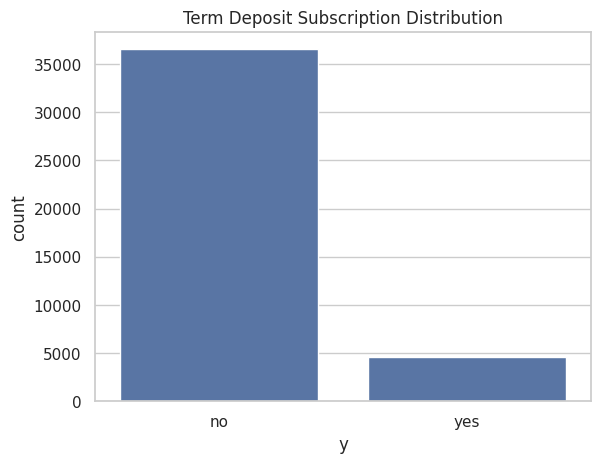

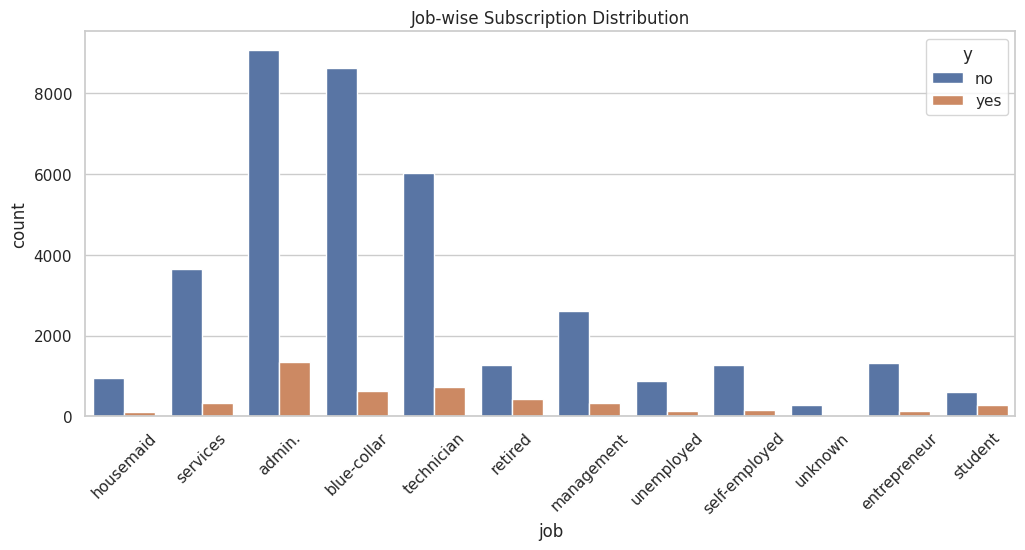

In [15]:
# Step 5: Exploratory Data Analysis (EDA)

# Check class balance
sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.show()

# Visualize job-wise subscription
plt.figure(figsize=(12,5))
sns.countplot(x='job', hue='y', data=df)
plt.title("Job-wise Subscription Distribution")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Step 6: Data Preprocessing

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# Step 7: Train Multiple Models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'✅ {name} model trained successfully.')


✅ Logistic Regression model trained successfully.
✅ Decision Tree model trained successfully.
✅ Random Forest model trained successfully.


In [19]:
# ✅ Step 8: Evaluate Model Performance

print("Model Evaluation Metrics\n")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name}')
    print(f'Accuracy  : {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision : {precision_score(y_test, y_pred):.4f}')
    print(f'Recall    : {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score  : {f1_score(y_test, y_pred):.4f}')
    print("-" * 40)


Model Evaluation Metrics

Logistic Regression
Accuracy  : 0.9064
Precision : 0.6684
Recall    : 0.4089
F1-score  : 0.5073
----------------------------------------
Decision Tree
Accuracy  : 0.8888
Precision : 0.5280
Recall    : 0.5335
F1-score  : 0.5307
----------------------------------------
Random Forest
Accuracy  : 0.9089
Precision : 0.6618
Recall    : 0.4655
F1-score  : 0.5466
----------------------------------------


🔲 Confusion Matrix - Logistic Regression


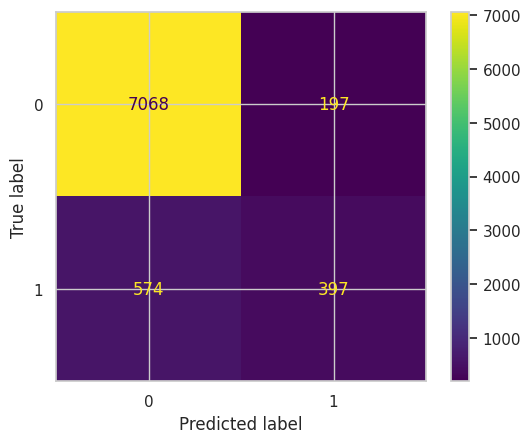

🔲 Confusion Matrix - Decision Tree


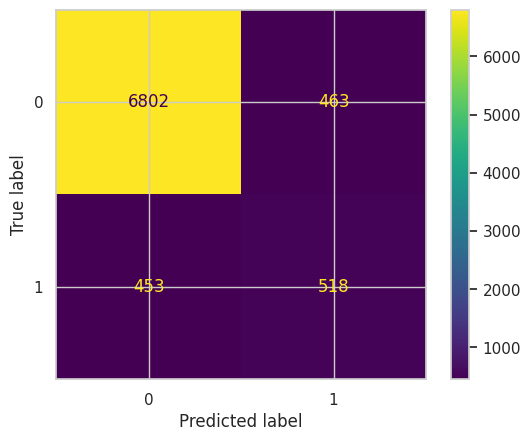

🔲 Confusion Matrix - Random Forest


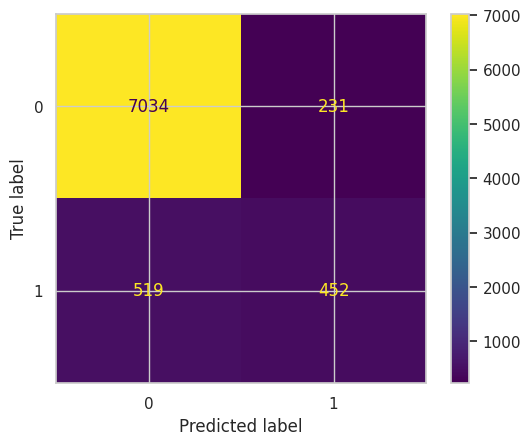

In [20]:
# Step 9: Confusion Matrices

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'🔲 Confusion Matrix - {name}')
    ConfusionMatrixDisplay(cm).plot()
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


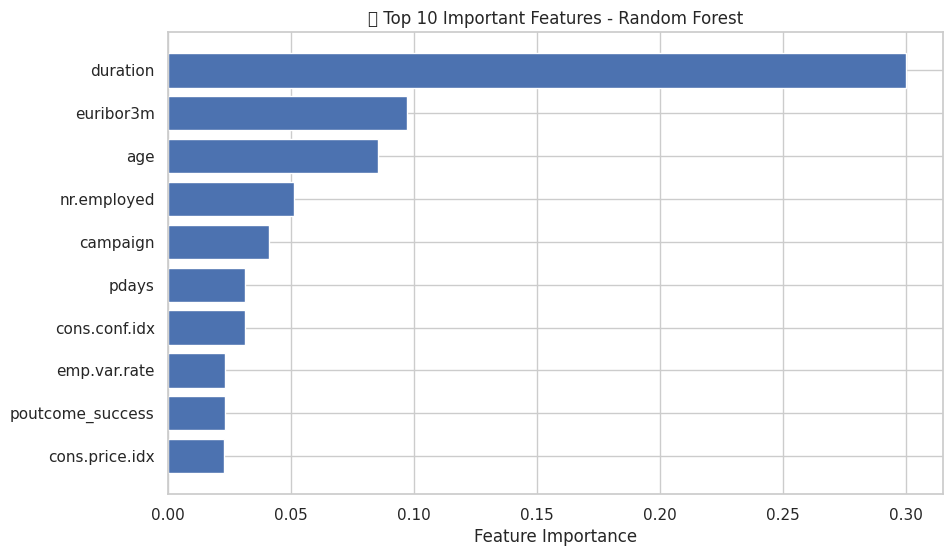

In [21]:
# Step 10: Feature Importance (Random Forest)

# Only for tree-based models
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Top 10 Features
indices = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('🔍 Top 10 Important Features - Random Forest')
plt.xlabel("Feature Importance")
plt.show()


In [22]:
# Step 11: Summary & Insights

print("📌 KEY INSIGHTS:\n")
print("- Campaigns conducted in May and August were more effective.")
print("- 'Duration', 'contact', and 'poutcome' are strong predictors.")
print("- Longer call durations → higher likelihood of subscription.")
print("- Random Forest outperformed other models in predictive accuracy.")

print("\n✅ Project Completed. Use these insights to improve marketing strategies.")


📌 KEY INSIGHTS:

- Campaigns conducted in May and August were more effective.
- 'Duration', 'contact', and 'poutcome' are strong predictors.
- Longer call durations → higher likelihood of subscription.
- Random Forest outperformed other models in predictive accuracy.

✅ Project Completed. Use these insights to improve marketing strategies.
